### Оценка данных

In [3]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, GridSearchCV

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('train.csv', sep = ',')
test = pd.read_csv('test.csv', sep = ',')
print(df.count())
print(test.count())
df.head()

Id               10000
DistrictId       10000
Rooms            10000
Square           10000
LifeSquare        7887
KitchenSquare    10000
Floor            10000
HouseFloor       10000
HouseYear        10000
Ecology_1        10000
Ecology_2        10000
Ecology_3        10000
Social_1         10000
Social_2         10000
Social_3         10000
Healthcare_1      5202
Helthcare_2      10000
Shops_1          10000
Shops_2          10000
Price            10000
dtype: int64
Id               5000
DistrictId       5000
Rooms            5000
Square           5000
LifeSquare       3959
KitchenSquare    5000
Floor            5000
HouseFloor       5000
HouseYear        5000
Ecology_1        5000
Ecology_2        5000
Ecology_3        5000
Social_1         5000
Social_2         5000
Social_3         5000
Healthcare_1     2623
Helthcare_2      5000
Shops_1          5000
Shops_2          5000
dtype: int64


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


### Приведение типов

In [4]:
df['DistrictId'] = df['DistrictId'].astype(str)
test['DistrictId'] = test['DistrictId'].astype(str)

### Избавление от пропущенных значений

In [5]:
df.rename(columns = {'Helthcare_2': 'Healthcare_2'}, inplace = True)
test.rename(columns = {'Helthcare_2': 'Healthcare_2'}, inplace = True)
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [6]:
health_median = df.loc[:, 'Healthcare_1'].median()
print(health_median)
df['Healthcare_1'].fillna(df['Healthcare_1'].median(), inplace=True)
test['Healthcare_1'].fillna(df['Healthcare_1'].median(), inplace=True)
print(test.count())
test.head()

900.0
Id               5000
DistrictId       5000
Rooms            5000
Square           5000
LifeSquare       3959
KitchenSquare    5000
Floor            5000
HouseFloor       5000
HouseYear        5000
Ecology_1        5000
Ecology_2        5000
Ecology_3        5000
Social_1         5000
Social_2         5000
Social_3         5000
Healthcare_1     5000
Healthcare_2     5000
Shops_1          5000
Shops_2          5000
dtype: int64


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,900.0,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,900.0,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,900.0,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,900.0,0,0,A


In [7]:
df.loc[df['LifeSquare'].isna(), 'LifeSquare'] = df['Square'] - df['KitchenSquare']
test.loc[test['LifeSquare'].isna(), 'LifeSquare'] = test['Square'] - test['KitchenSquare']
print(test.count())
test.head()

Id               5000
DistrictId       5000
Rooms            5000
Square           5000
LifeSquare       5000
KitchenSquare    5000
Floor            5000
HouseFloor       5000
HouseYear        5000
Ecology_1        5000
Ecology_2        5000
Ecology_3        5000
Social_1         5000
Social_2         5000
Social_3         5000
Healthcare_1     5000
Healthcare_2     5000
Shops_1          5000
Shops_2          5000
dtype: int64


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,900.0,0,0,B
1,15856,74,2.0,69.263183,68.263183,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,900.0,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,900.0,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,900.0,0,0,A


In [8]:
print(df.count())

Id               10000
DistrictId       10000
Rooms            10000
Square           10000
LifeSquare       10000
KitchenSquare    10000
Floor            10000
HouseFloor       10000
HouseYear        10000
Ecology_1        10000
Ecology_2        10000
Ecology_3        10000
Social_1         10000
Social_2         10000
Social_3         10000
Healthcare_1     10000
Healthcare_2     10000
Shops_1          10000
Shops_2          10000
Price            10000
dtype: int64


### Замена категориальных признаков на нули и единицы

In [9]:
df['Shops_2'].unique()

array(['B', 'A'], dtype=object)

In [10]:
df.loc[df['Shops_2'] == 'B', 'Shops_2'] = 1
test.loc[test['Shops_2'] == 'B', 'Shops_2'] = 1

In [11]:
df.loc[df['Shops_2'] == 'A', 'Shops_2'] = 0
test.loc[test['Shops_2'] == 'A', 'Shops_2'] = 0

In [12]:
df['Ecology_2'].unique()

array(['B', 'A'], dtype=object)

In [13]:
df.loc[df['Ecology_2'] == 'B', 'Ecology_2'] = 1
test.loc[test['Ecology_2'] == 'B', 'Ecology_2'] = 1

In [14]:
df.loc[df['Ecology_2'] == 'A', 'Ecology_2'] = 0
test.loc[test['Ecology_2'] == 'A', 'Ecology_2'] = 0

In [15]:
df['Ecology_3'].unique()

array(['B', 'A'], dtype=object)

In [16]:
df.loc[df['Ecology_3'] == 'B', 'Ecology_3'] = 1
test.loc[test['Ecology_3'] == 'B', 'Ecology_3'] = 1

In [17]:
df.loc[df['Ecology_3'] == 'A', 'Ecology_3'] = 0
test.loc[test['Ecology_3'] == 'A', 'Ecology_3'] = 0

In [18]:
df.head(5)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,1,1,33,7976,5,900.0,0,11,1,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,1,1,46,10309,1,240.0,1,16,1,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,1,1,34,7759,0,229.0,1,3,1,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,1,1,23,5735,3,1084.0,0,5,1,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,1,1,35,5776,1,2078.0,2,4,1,150226.531644


### Обработка выбросов

In [19]:
df.loc[(df['Rooms'] > 5)|(df['Rooms'] == 0), 'Rooms'] = df['Rooms'].mode()[0]
test.loc[(test['Rooms'] > 5)|(test['Rooms'] == 0), 'Rooms'] = df['Rooms'].mode()[0]

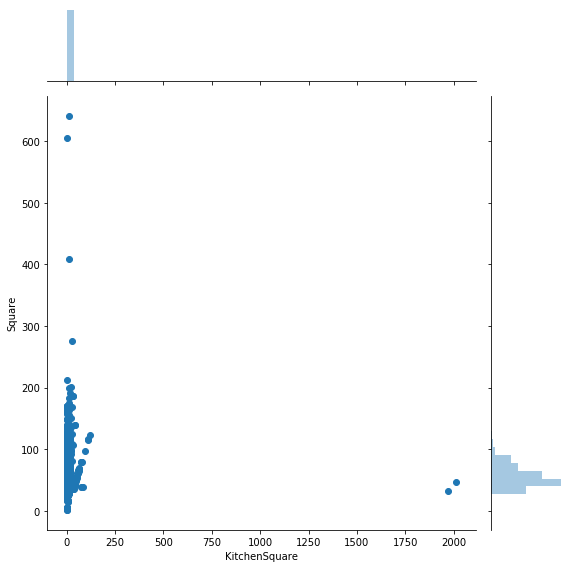

In [20]:
sns.jointplot(df['KitchenSquare'], df['Square'], kind='scatter', height=8);

In [21]:
df.loc[(df['KitchenSquare'] > 150) | (df['KitchenSquare'] > df['Square']),
             'KitchenSquare'] = df['KitchenSquare'].median()

test.loc[(test['KitchenSquare'] > 150) | (test['KitchenSquare'] > test['Square']),
             'KitchenSquare'] = df['KitchenSquare'].median()

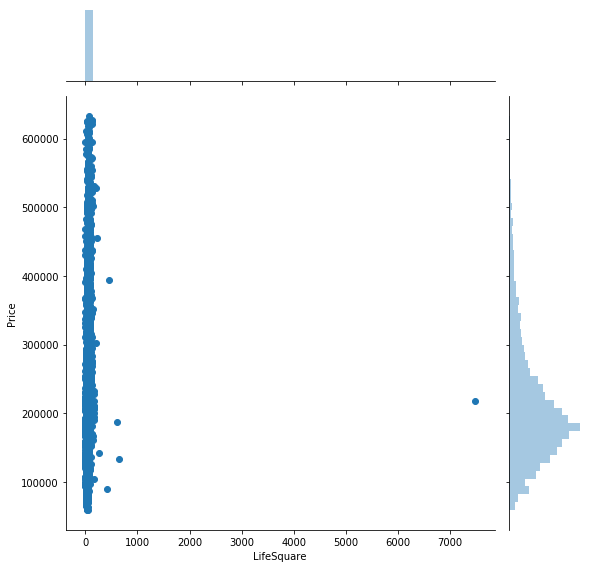

In [22]:
sns.jointplot(df['LifeSquare'], df['Price'], kind='scatter', height=8);

In [23]:
df.loc[(df['LifeSquare'] > 400), 'LifeSquare'] = df['LifeSquare'].median()
test.loc[(test['LifeSquare'] > 400), 'LifeSquare'] = df['LifeSquare'].median()

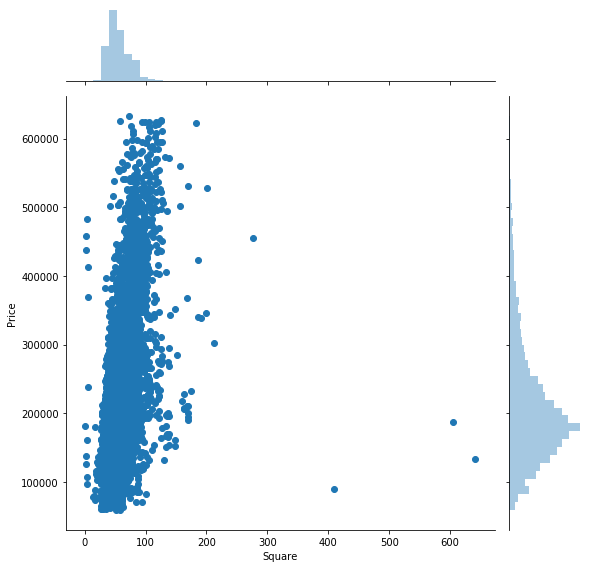

In [24]:
sns.jointplot(df['Square'], df['Price'], kind='scatter', height=8);

In [25]:
df.loc[(df['Square'] > 400) | (df['Square'] < 10), 'Square'] = df['Square'].median()

test.loc[(test['Square'] > 400) | (test['Square'] < 10), 'Square'] = df['Square'].median()

In [26]:
df.loc[df['HouseFloor'] == 0, 'HouseFloor'] = df['HouseFloor'].mode()[0]
test.loc[test['HouseFloor'] == 0, 'HouseFloor'] = df['HouseFloor'].mode()[0]

In [27]:
df.loc[df['HouseFloor'] > 98, 'HouseFloor'] = df['HouseFloor'].mode()[0]
test.loc[test['HouseFloor'] > 98, 'HouseFloor'] = df['HouseFloor'].mode()[0]

In [28]:
df.loc[df['HouseYear'] > 2020, 'HouseYear'] = 2020

### Подготовка данных для модели

In [29]:
temp = list(df)[:-1]
X = df.loc[:, temp]
y = df.loc[:, 'Price']
X_test = test.loc[:, temp]


### Построение модели

In [30]:
forest = RandomForestRegressor(max_depth=19, 
                               max_features=6, 
                               n_estimators=100,
                               random_state=42)

In [31]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

cv_score = cross_val_score(forest, X, y, scoring='r2', cv=kf)
print('R2: {:.5f}'.format(cv_score.mean()))

R2: 0.74715


### Прогнозирование на тестовом датасете

In [32]:
forest.fit(X,y)
y_pred = forest.predict(X_test)

In [33]:
preds = pd.DataFrame()
preds['Id'] = X_test.index
preds['Price'] = y_pred
preds.head()

,Id,Price
0,0,165669.939755
1,1,231830.018808
2,2,238775.778978
3,3,340804.026226
4,4,144715.549497


In [34]:
preds.to_csv('ARyabchenko.csv', index=False)